In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

/kaggle/input/dapprojekt24-1/train.csv
/kaggle/input/dapprojekt24-1/test.csv


**Data loading and basic informations**

In [2]:
train_df = pd.read_csv("../input/dapprojekt24-1/train.csv")
test_df = pd.read_csv("../input/dapprojekt24-1/test.csv")

In [3]:
train_df.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Target,Id
0,2010-01-04,MMM,53.295380,83.019997,83.449997,82.669998,83.089996,3043700.0,0,0
1,2010-01-05,MMM,52.961575,82.500000,83.230003,81.699997,82.800003,2847000.0,0,1
2,2010-01-06,MMM,53.712681,83.669998,84.599998,83.510002,83.879997,5268500.0,0,2
3,2010-01-07,MMM,53.751179,83.730003,83.760002,82.120003,83.320000,4470100.0,0,3
4,2010-01-08,MMM,54.129955,84.320000,84.320000,83.300003,83.690002,3405800.0,0,4


In [4]:
train_df.describe()

,Adj Close,Close,High,Low,Open,Volume,Target,Id
count,474171.000000,474171.000000,474171.000000,474171.000000,474171.000000,4.741550e+05,501400.000000,501400.000000
mean,68.557799,78.063775,78.793316,77.257284,78.038791,7.793082e+06,0.739250,250699.500000
std,145.555119,146.684837,148.337565,144.898091,146.575314,3.203411e+07,0.439044,144741.856823
min,0.700000,0.700000,-60.975002,0.650000,0.700000,0.000000e+00,0.000000,0.000000
25%,24.205503,30.860001,31.170000,30.530001,30.840561,9.811000e+05,0.000000,125349.750000
50%,42.509499,51.540001,52.049999,51.009998,51.529999,2.179300e+06,1.000000,250699.500000
75%,73.034061,84.540001,85.309998,83.720001,84.529999,5.196650e+06,1.000000,376049.250000
max,3892.889893,3892.889893,3946.500000,3815.500000,3900.000000,1.880998e+09,1.000000,501399.000000


**Dimensionality of the dataset**
* How many samples? 
* How many features? 
* How many unique stocks?


In [5]:
train_len = len(train_df)
test_len = len(test_df)

print(f"Train set consist of {train_len} samples, while the test set consist of {test_len} samples. \nThat sums up to {train_len+test_len}, and the ratio of train and test set is {round(train_len/(train_len+test_len)*100.0, 3)} : {round(test_len/(train_len+test_len)*100.0, 3)}.")

Train set consist of 501400 samples, while the test set consist of 209600 samples. 
That sums up to 711000, and the ratio of train and test set is 70.52 : 29.48.


In [6]:
print(f"Given dataset consists out of {len(train_df.columns)} features.")
print(f"Features are: {train_df.columns.tolist()}")

Given dataset consists out of 10 features.
Features are: ['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'Target', 'Id']


In [7]:
train_unique = train_df["Symbol"].nunique()
test_unique = test_df["Symbol"].nunique()

print(f"There are {train_unique} unique stocks among train samples and {test_unique} unique stocks among test samples.")

There are 200 unique stocks among train samples and 200 unique stocks among test samples.


**Missing values**
* Are there any? 
* If yes, what will you do about it? Why?

In [8]:
print(f"Amount of missing data is:\n{train_df.isna().sum()}\n")
train_df1 = train_df.copy()
"""
print("I will use the next method for filling the missing values:")
print("Open price equals close price from the day before, and close price equals open price from the next day.")
print("I can't know Low and High so the Low value will be the smaller value from (Open, Close), and High will be the higher one.")
print("Volume and Adj Close will be mean between prices from the day before and next day.")
print("Unfortunately, I must use loops because if I just fill the data with the row before or after, I will fill Open value with Open, and I don't want that.")



train_df1['Date'] = pd.to_datetime(train_df1['Date'])

for i in range(1, len(train_df1) - 1):
    if train_df1.iloc[i].isnull().any():
        past = False
        future = False
        if (train_df1.at[i-1, 'Symbol'] == train_df1.at[i, 'Symbol']) and (train_df1.at[i-1, 'Date'] == train_df1.at[i, 'Date'] - pd.Timedelta(days=1)):
            train_df1.at[i, 'Open'] = train_df1.at[i-1, 'Close']
            past = True
        if (train_df1.at[i+1, 'Symbol'] == train_df1.at[i, 'Symbol']) and (train_df1.at[i+1, 'Date'] == train_df1.at[i, 'Date'] + pd.Timedelta(days=1)):
            train_df1.at[i, 'Close'] = train_df1.at[i+1, 'Open']
            future = True
        if past and future:
            train_df1.at[i, 'Low'] = min(train_df1.at[i, 'Open'], train_df1.at[i, 'Close'])
            train_df1.at[i, 'High'] = max(train_df1.at[i, 'Open'], train_df1.at[i, 'Close'])    
            train_df1.at[i, 'Adj Close'] = (train_df1.at[i-1, 'Adj Close'] + train_df1.at[i+1, 'Adj Close']) / 2
            train_df1.at[i, 'Volume'] = (train_df1.at[i-1, 'Volume'] + train_df1.at[i+1, 'Volume']) / 2
        
            

print(f"\nAmount of missing data after interpolation is:\n{train_df1.isna().sum()}\n")

"""

print("Unfortunately, my tries weren't effective, and considering that missing values occupy just around 5 % of the data set, I will remove those rows.")

train_df1.dropna(how='any', inplace=True)
#print(f"Amount of missing data now is:\n{train_df.isna().sum()}\n")

Amount of missing data is:
Date             0
Symbol           0
Adj Close    27229
Close        27229
High         27229
Low          27229
Open         27229
Volume       27245
Target           0
Id               0
dtype: int64

Unfortunately, my tries weren't effective, and considering that missing values occupy just around 5 % of the data set, I will remove those rows.


**Duplicates**
* Are there any? 
* If yes, what will you do about it? Why?

In [9]:
print("Number of duplicates:", train_df1.duplicated().sum())
print("There are no duplicates so I don't have to do anything.")

Number of duplicates: 0
There are no duplicates so I don't have to do anything.


**Data validation**
* Are there any wrong (impossible) data? 
* If yes, what will you do about it?


In [10]:
train_data = train_df1[train_df1['High'] > train_df1['Low']]
train_data = train_data[(train_data['Close'] >= 0) & (train_data['High'] >= 0) & (train_data['Low'] >= 0) & (train_data['Open'] >= 0) & (train_data['Volume'] >= 0)]
print("I removed impossible data. That data could be two things. First one is when High value was lower than Low value. Secone one was when any of the prices was negative.")

train_data.describe()

I removed impossible data. That data could be two things. First one is when High value was lower than Low value. Secone one was when any of the prices was negative.


,Adj Close,Close,High,Low,Open,Volume,Target,Id
count,473993.000000,473993.000000,473993.000000,473993.000000,473993.000000,4.739930e+05,473993.000000,473993.000000
mean,68.573600,78.082176,78.828541,77.275442,78.057187,7.795135e+06,0.781632,251563.327186
std,145.579896,146.708775,148.350943,144.921734,146.599231,3.203938e+07,0.413139,145905.050058
min,0.700000,0.700000,0.710000,0.650000,0.700000,2.000000e+02,0.000000,0.000000
25%,24.216660,30.870001,31.180000,30.540001,30.860001,9.812000e+05,1.000000,124415.000000
50%,42.521221,51.560001,52.060501,51.025002,51.540001,2.179500e+06,1.000000,252100.000000
75%,73.050003,84.559998,85.330002,83.739998,84.540001,5.198100e+06,1.000000,378231.000000
max,3892.889893,3892.889893,3946.500000,3815.500000,3900.000000,1.880998e+09,1.000000,501399.000000


**Features distributions**
* show distributions of features

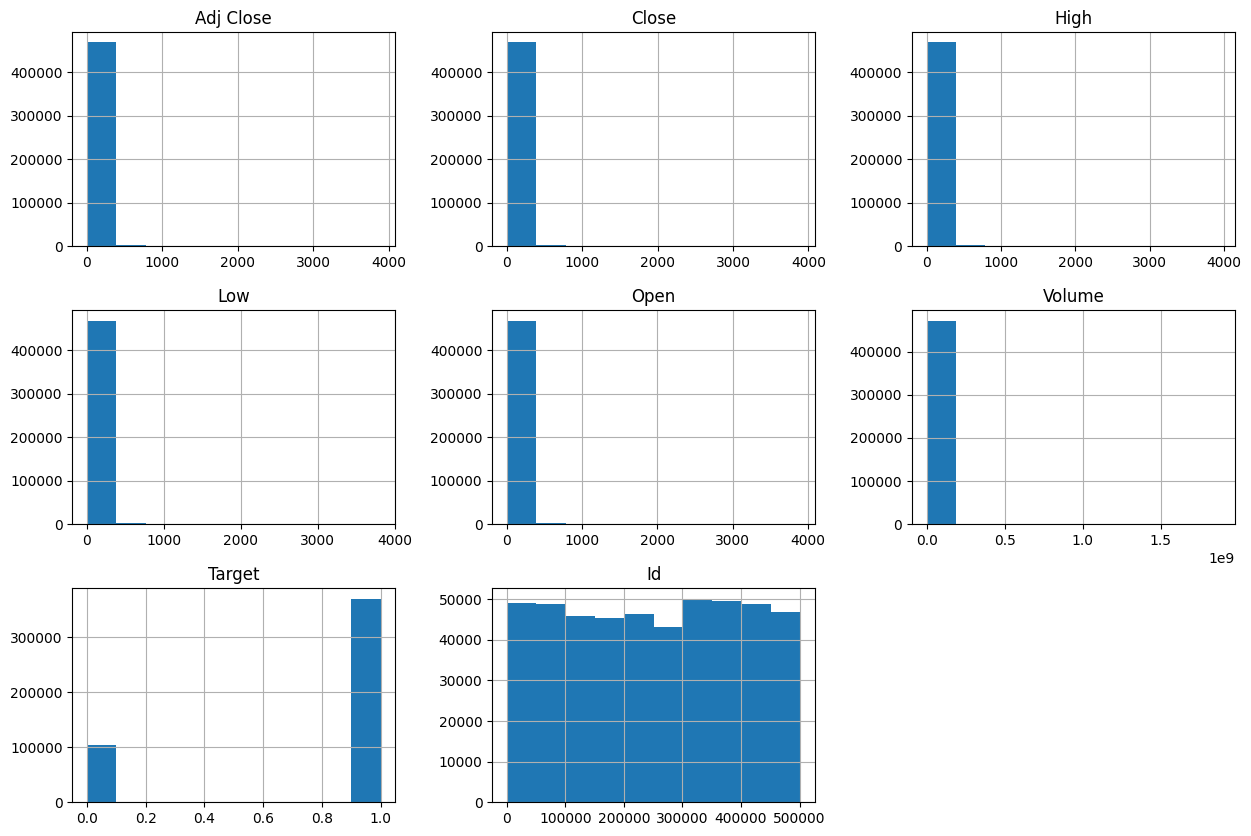

In [11]:
import matplotlib.pyplot as plt

train_data.hist(figsize=(15, 10))
plt.show()

Because of outliers, I will limit the max value so that the graph looks more infomrative.


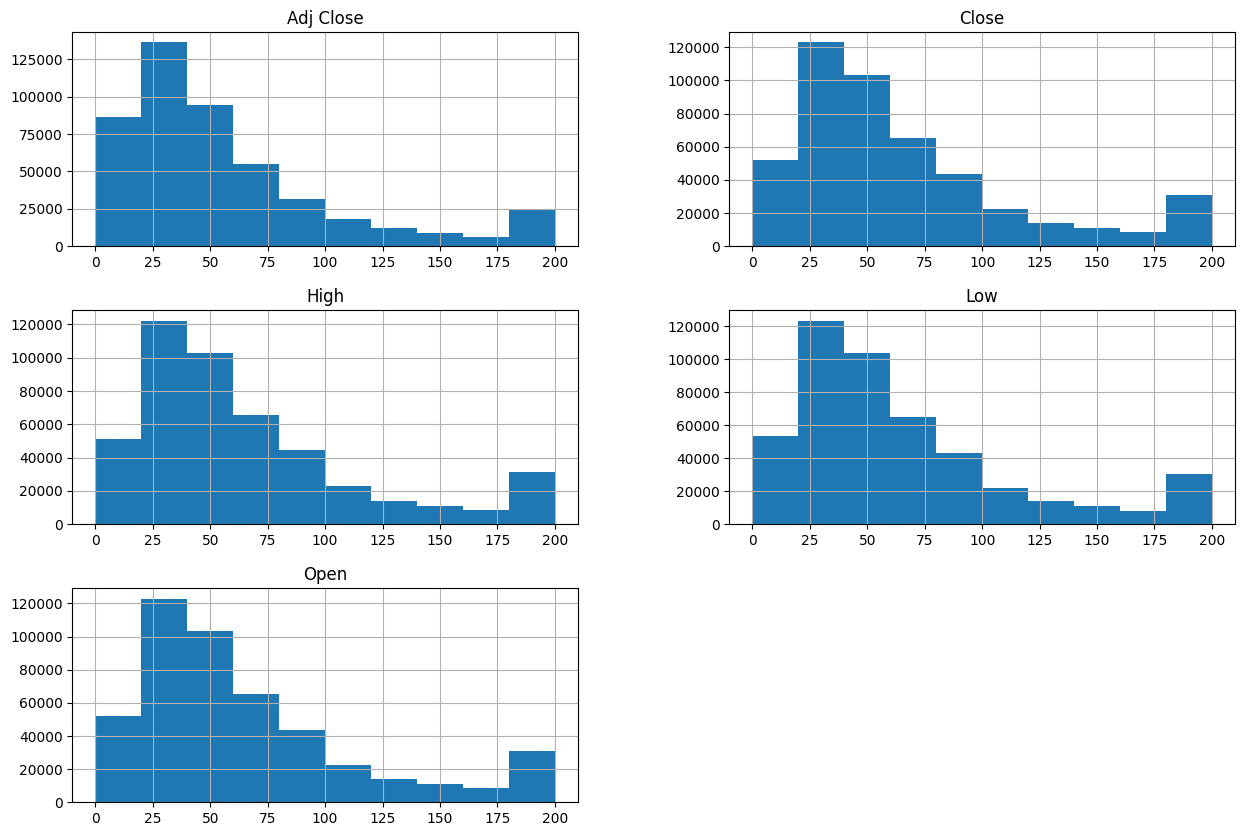

In [12]:
print("Because of outliers, I will limit the max value so that the graph looks more infomrative.")
import matplotlib.pyplot as plt

train_data_plot = train_data.copy()

train_data_plot[['Adj Close', 'Close', 'High', 'Low', 'Open']] = train_data_plot[['Adj Close', 'Close', 'High', 'Low', 'Open']].clip(upper=200)

train_data_plot[['Adj Close', 'Close', 'High', 'Low', 'Open']].hist(figsize=(15, 10), range=(0, 200))
plt.show()

**Visualizations**
* write a function that creates a line plot for a single stock with time on x-axis and one or more features on y-axis.


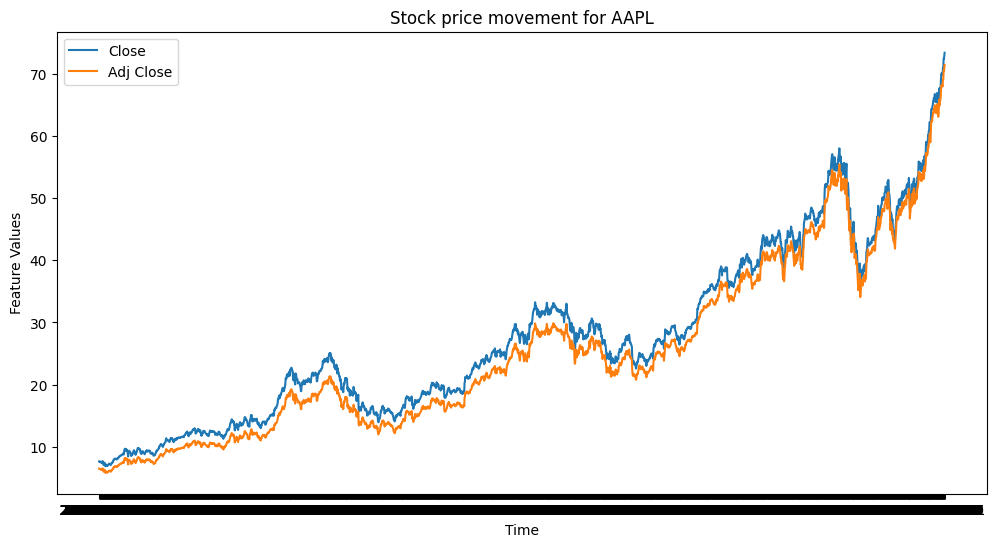

In [13]:
def visualize_stocks(df, features):
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df[features])
    plt.xlabel('Time')
    plt.ylabel('Feature Values')
    plt.title('Stock price movement for ' + df['Symbol'].iloc[0])
    plt.legend(features)
    plt.show()

visualize_stocks(train_df1[train_df1['Symbol'] == 'AAPL'], ['Close', 'Adj Close'])

**What is the best stock to buy on 15.4.2017.? Why?**


In [14]:
start = train_df[train_df['Date']=='2017-04-13']
stop = train_df[train_df['Date']=='2017-06-15']

difference = stop.set_index('Symbol')['Close'] / start.set_index('Symbol')['Close']

difference = difference.reset_index()

top3 = difference.nlargest(3, 'Close')

print(top3)

print("This are top 3 stocks to buy. They had the biggest increase in Close price in the next 2 months (first one 59%!!), and value shown represents correlation between prices on that day and two months after.")
print("P.s. I have chosen 13/4/17 because 15/4 is on Saturday.")

    Symbol     Close
134   NVDA  1.595664
56     DPZ  1.204091
160    ROL  1.196463
This are top 3 stocks to buy. They had the biggest increase in Close price in the next 2 months (first one 59%!!), and value shown represents correlation between prices on that day and two months after.
P.s. I have chosen 13/4/17 because 15/4 is on Saturday.


**Baseline model**
* prepare the data for the first classification

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

features = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

X_train = train_data[features]
y_train = train_data['Target']

X_test = test_df[features]

imputer = SimpleImputer(strategy='mean')
X_test_imputed = imputer.fit_transform(X_test)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

predictions = rf_classifier.predict(X_test_imputed)

output = pd.DataFrame({'Id': test_df['Id'], 'TARGET': predictions})

output_path = '/kaggle/working/submission.csv'
output.to_csv(output_path, index=False)


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [16]:
output.head()

,Id,TARGET
0,0,1
1,1,1
2,2,1
3,3,0
4,4,1
